# 1.2.2 OpenCV

## 이미지 입출력

#### 이미지 다운로드

코드 블럭에서 ! 뒤에 명령어를 사용하면 명령어가 터미널에서 실행됩니다.   
아래 코드 블럭을 실행하면, like_lenna 이미지를 다운로드할 수 있습니다.

In [1]:
!wget https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna224.png -O like_lenna.png

--2024-02-26 05:41:50--  https://raw.githubusercontent.com/Cobslab/imageBible/main/image/like_lenna224.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30283 (30K) [image/png]
Saving to: ‘like_lenna.png’

like_lenna.png      100%[===================>]  29.57K  --.-KB/s    in 0.003s  

2024-02-26 05:41:50 (11.0 MB/s) - ‘like_lenna.png’ saved [30283/30283]



#### 이미지 읽어오기

OpenCV는 해당 이미지 파일을 numpy.ndarray로 불러옵니다.

In [2]:
import cv2

image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)
if image is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")
print(f"변수 타입: {type(image)}")

이미지를 읽어왔습니다.
변수 타입: <class 'numpy.ndarray'>


In [ ]:
# 로컬 환경에서의 이미지 출력

# cv2.imshow(image)

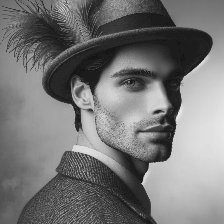

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [4]:
print(f"이미지 배열의 형태: {image.shape}")

이미지 배열의 형태: (224, 224)


### 이미지 변환

OpenCV를 사용해서 해볼 수 있는 다양한 변환 기능이 있습니다. 그중 기본적으로 많이 사용할, 크기 변환과 대칭 변환, 회전 변환 기능을 사용해 보겠습니다.

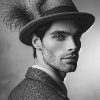

In [5]:
# 사이즈 변환

image_small = cv2.resize(image,(100,100))
cv2_imshow(image_small)

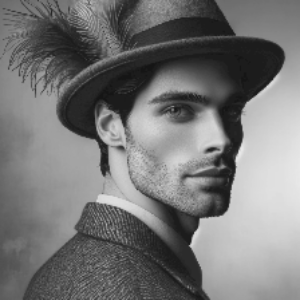

In [6]:
# 이미지 사이즈 원래대로 돌리기

import numpy as np
new_height = 300
new_width = 300
dst = np.zeros((new_height, new_width), dtype=np.uint8)
cv2.resize(image, (new_width, new_height), dst=dst)
cv2_imshow(dst)

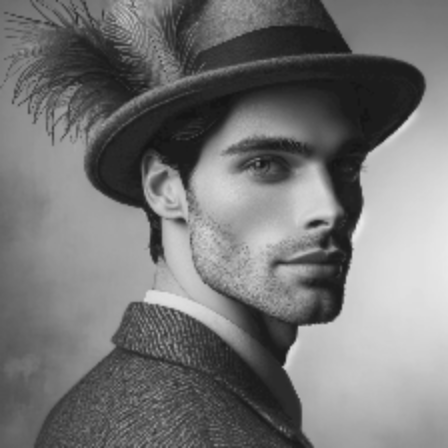

In [7]:
# 배율로 사이즈 변환

image_big = cv2.resize(image,dsize=None,fx=2,fy=2,)
cv2_imshow(image_big)

#### 대칭 변환

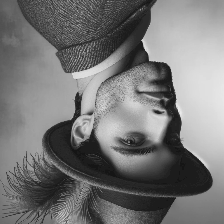

In [8]:
image_fliped = cv2.flip(image,0)
cv2_imshow(image_fliped)

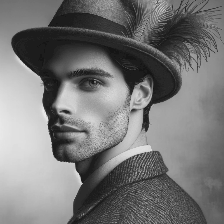

In [9]:
image_fliped = cv2.flip(image,1)
cv2_imshow(image_fliped)

#### 회전 변환

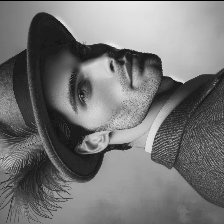

In [10]:
height, width = image.shape
matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
result = cv2.warpAffine(image, matrix, (width, height))
cv2_imshow(result)

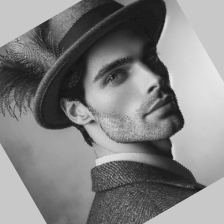

In [11]:
matrix = cv2.getRotationMatrix2D((width/2,height/2),30,1)
result = cv2.warpAffine(image,matrix,(width,height),borderValue=200)
cv2_imshow(result)

이미지 자르기

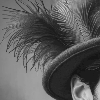

In [12]:
cv2_imshow(image[:100,:100])

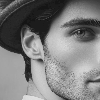

In [13]:
cv2_imshow(image[50:150,50:150])

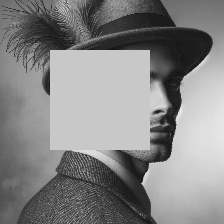

In [14]:
croped_image = image[50:150,50:150]
croped_image[:] = 200
cv2_imshow(image)

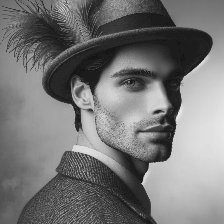

In [15]:
image = cv2.imread('like_lenna.png', cv2.IMREAD_GRAYSCALE)
croped_image = image[50:150,50:150].copy()
croped_image[:] = 200
cv2_imshow(image)

### 도형 그리기


OpenCV는 읽어온 이미지 위에 원하는 도형을 그릴 수 있는 기능을 제공합니다. 이 기능을 사용해 이미지 위에 객체를 구분하는 박스를 그리거나, 글씨를 쓰는 일 등의 작업을 할 수 있습니다.

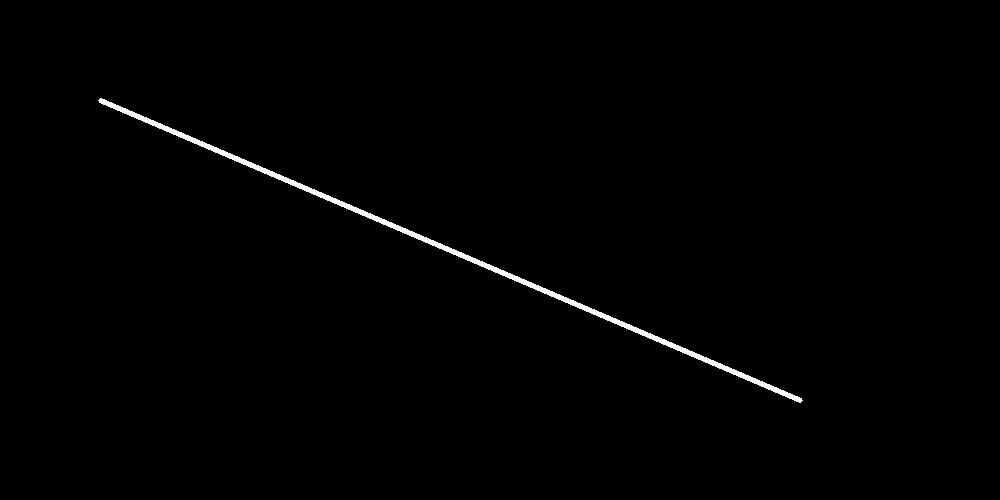

In [16]:
space = np.zeros((500, 1000), dtype=np.uint8)
line_color = 255
space = cv2.line(space, (100, 100), (800, 400), line_color, 3, 1)

cv2_imshow(space)

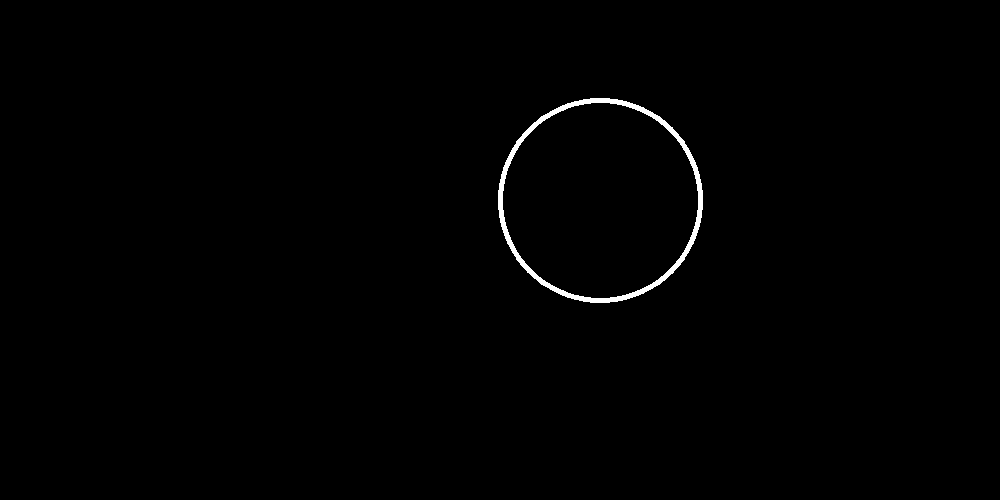

In [17]:
space = np.zeros((500, 1000), dtype=np.uint8)
color = 255
space = cv2.circle(space, (600, 200), 100, color, 4, 1)

cv2_imshow(space)

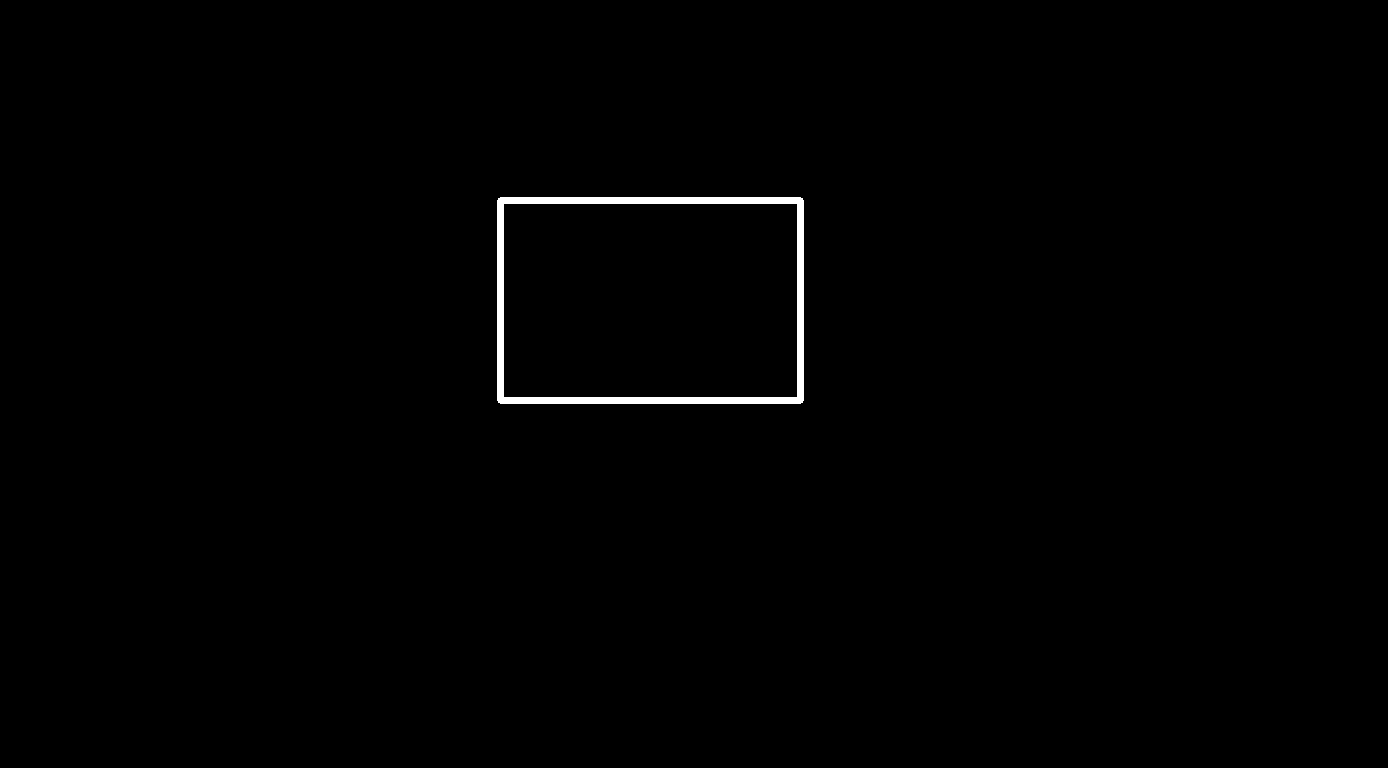

In [18]:
space = np.zeros((768, 1388), dtype=np.uint8)
color = 255
space = cv2.rectangle(space, (500, 200), (800, 400), color, 5, 1)

cv2_imshow(space)

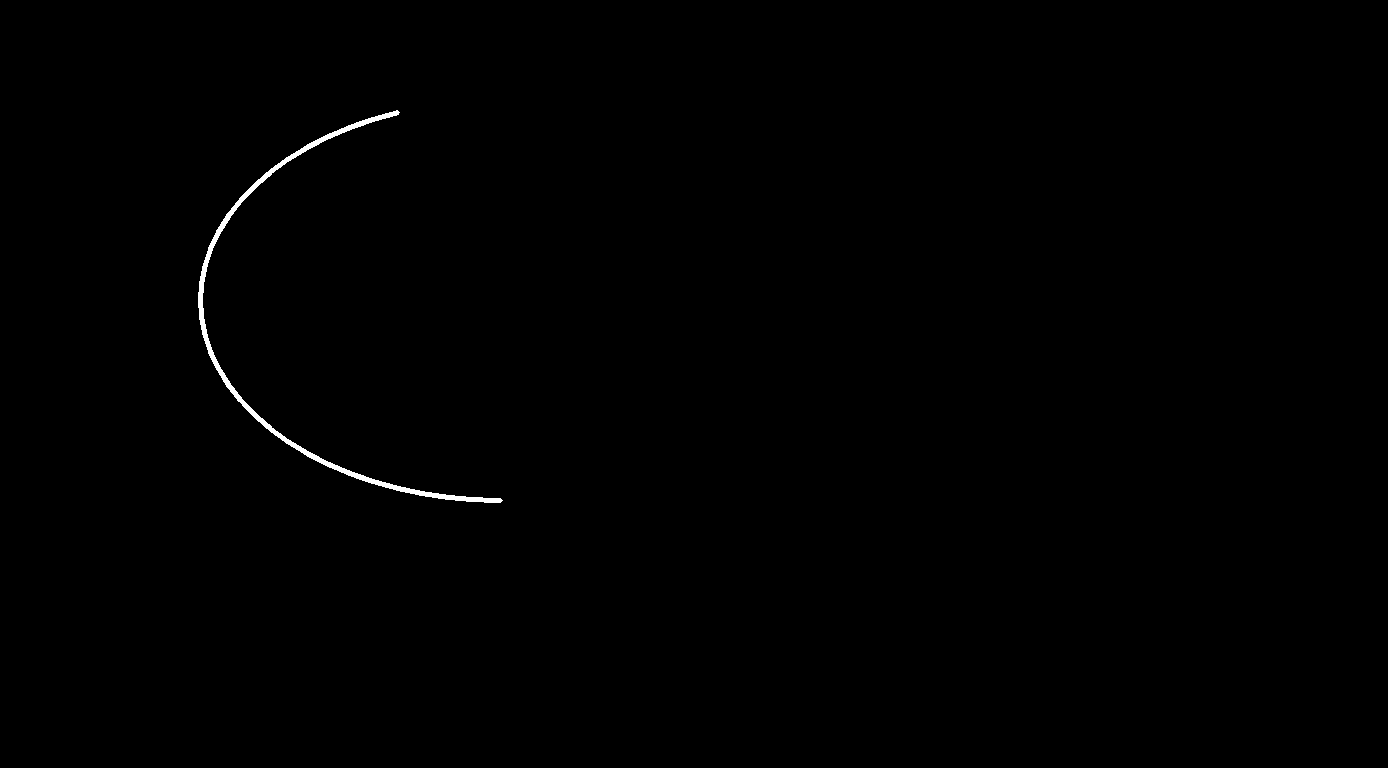

In [19]:
space = np.zeros((768, 1388), dtype=np.uint8)
color = 255
space = cv2.ellipse(space, (500, 300), (300, 200), 0, 90, 250, color, 4)

cv2_imshow(space)

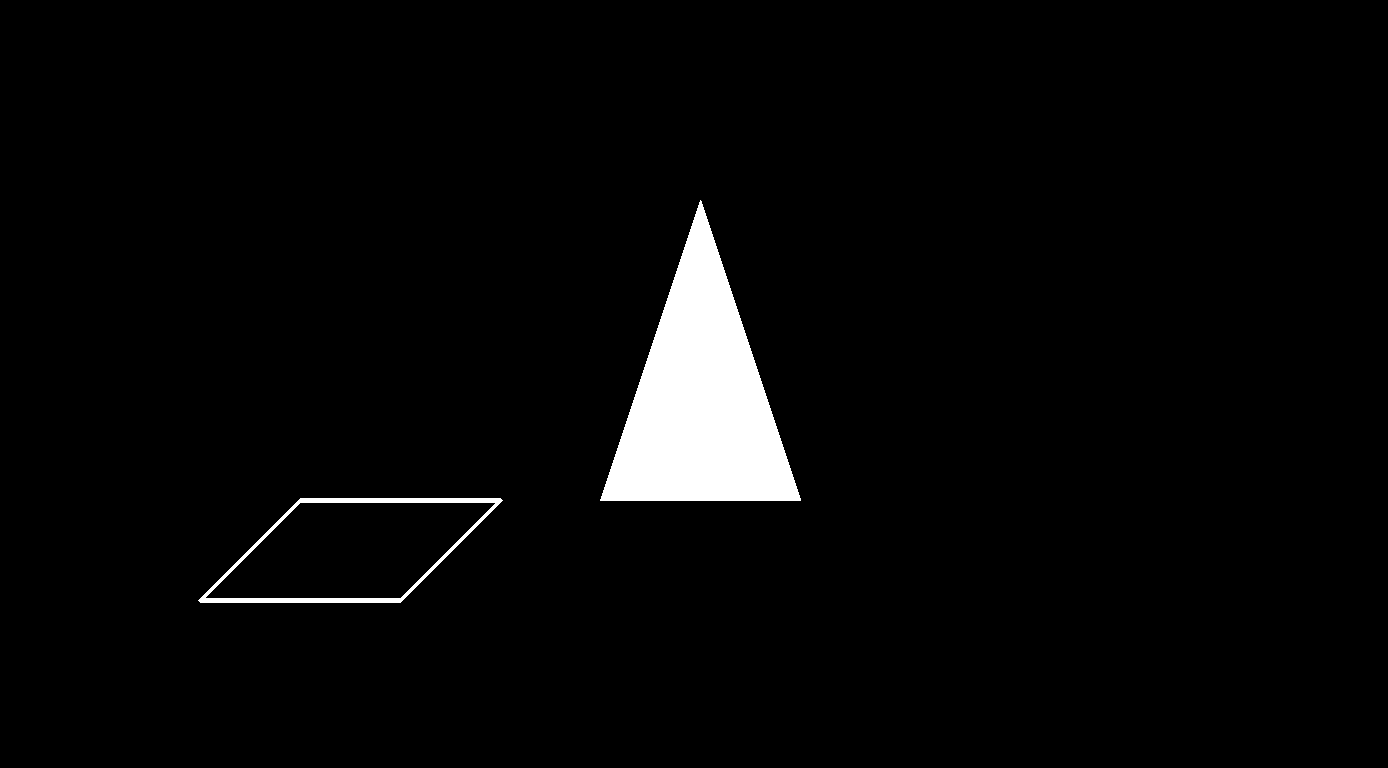

In [20]:
space = np.zeros((768, 1388), dtype=np.uint8)
color = 255
obj1 = np.array([[300, 500], [500, 500], [400, 600], [200, 600]])
obj2 = np.array([[600, 500], [800, 500], [700, 200]])
space = cv2.polylines(space, [obj1], True, color, 3)
space = cv2.fillPoly(space, [obj2], color, 1)

cv2_imshow(space)

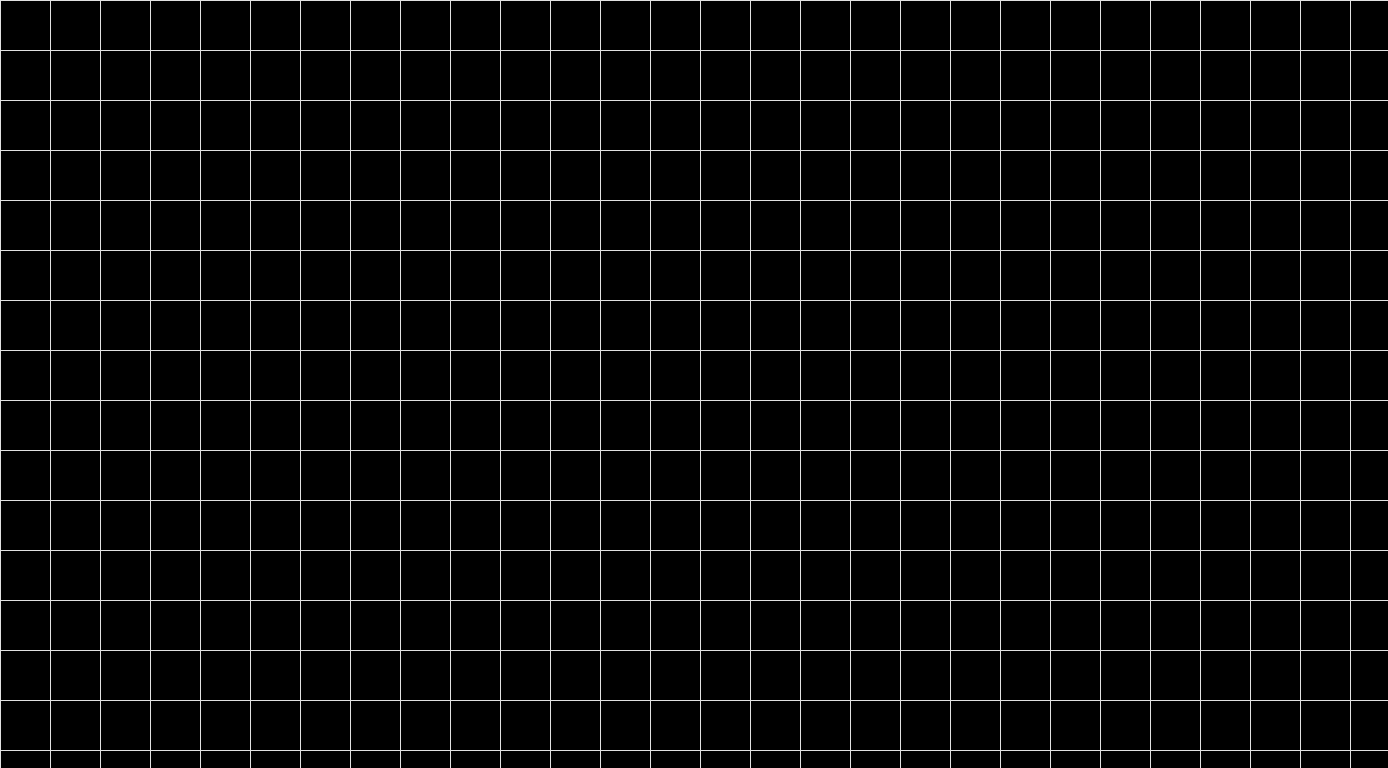

In [21]:
space = np.zeros((768, 1388), dtype=np.uint8)

# 격자 간격 및 색상 설정
grid_spacing = 50
grid_color = 225

# 이미지에 격자 그리기
for x in range(0, space.shape[1], grid_spacing):
    cv2.line(space, (x, 0), (x, space.shape[0]), grid_color, 1)

for y in range(0, space.shape[0], grid_spacing):
    cv2.line(space, (0, y), (space.shape[1], y), grid_color, 1)

cv2_imshow(space)